<a href="https://colab.research.google.com/github/mahabdoli/Tumor-Detection-Supervised-Autoencoder-Classifier/blob/main/SupervisedAE_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/med project/med/src')
sys.path.append('/content/drive/MyDrive/med project/med/outputs')
sys.path.append('/content/drive/MyDrive/med project/med/input')

In [ ]:
import torch
from datasets import *
from model import *
from utils import *
from train import *

In [ ]:
dataset_train, dataset_valid, dataset_classes = get_datasets()

In [ ]:
subset_train = list(range(0,2000))
subset_valid = list(range(0,700))

dataset_trainsubset = torch.utils.data.Subset(dataset_train, subset_train)
dataset_validsubset = torch.utils.data.Subset(dataset_valid, subset_valid)

In [ ]:
print(f"[INFO]: Number of training images: {len(dataset_trainsubset)}")
print(f"[INFO]: Number of validation images: {len(dataset_validsubset)}")
print(f"[INFO]: Class names: {dataset_classes}\n")

[INFO]: Number of training images: 2000
[INFO]: Number of validation images: 700
[INFO]: Class names: ['notumor', 'tumor']



In [ ]:
# Load the training and validation data loaders.
train_loader, valid_loader = get_data_loaders(dataset_trainsubset, dataset_validsubset)

In [ ]:
# Learning_parameters. 
lr = 0.0001
epochs = 15
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")
print(f"Learning rate: {lr}")
print(f"Epochs to train for: {epochs}\n")

Computation device: cpu
Learning rate: 0.0001
Epochs to train for: 15



In [ ]:
model = SupervisedAE()

In [ ]:
from torchsummary import summary

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 64, 28, 28]          18,496
            Linear-3                  [-1, 256]      12,845,312
            Linear-4                   [-1, 32]           8,224
            Linear-5                  [-1, 256]           8,448
            Linear-6                [-1, 50176]      12,895,232
   ConvTranspose2d-7           [-1, 64, 30, 30]          36,928
   ConvTranspose2d-8            [-1, 3, 32, 32]           1,731
            Linear-9                    [-1, 2]              66
Total params: 25,815,333
Trainable params: 25,815,333
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.45
Params size (MB): 98.48
Estimated Total Size (MB): 99.94
-----------------------------------

In [ ]:
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

25,815,333 total parameters.
25,815,333 training parameters.


In [ ]:
# Optimizer.
optimizer = optim.Adam(model.parameters(), lr=lr)
# Loss function.
criterion11 = nn.CrossEntropyLoss()
criterion12 = nn.L1Loss()

In [ ]:
# Lists to keep track of losses and accuracies.
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# Start the training.
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = trainsupervised(model, train_loader,optimizer, criterion11, criterion12)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader, criterion11, supervised=True)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)

[INFO]: Epoch 1 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.030, training acc: 89.700
Validation loss: 1.190, validation acc: 58.000
--------------------------------------------------
[INFO]: Epoch 2 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.012, training acc: 93.150
Validation loss: 1.142, validation acc: 59.571
--------------------------------------------------
[INFO]: Epoch 3 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.007, training acc: 94.200
Validation loss: 0.575, validation acc: 78.857
--------------------------------------------------
[INFO]: Epoch 4 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.006, training acc: 95.100
Validation loss: 0.917, validation acc: 73.000
--------------------------------------------------
[INFO]: Epoch 5 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.016, training acc: 95.750
Validation loss: 0.776, validation acc: 78.571
--------------------------------------------------
[INFO]: Epoch 6 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.010, training acc: 97.400
Validation loss: 0.772, validation acc: 82.000
--------------------------------------------------
[INFO]: Epoch 7 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.011, training acc: 97.950
Validation loss: 0.720, validation acc: 83.857
--------------------------------------------------
[INFO]: Epoch 8 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.000, training acc: 97.650
Validation loss: 0.552, validation acc: 86.571
--------------------------------------------------
[INFO]: Epoch 9 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.003, training acc: 98.050
Validation loss: 0.745, validation acc: 84.571
--------------------------------------------------
[INFO]: Epoch 10 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.002, training acc: 98.200
Validation loss: 0.671, validation acc: 85.714
--------------------------------------------------
[INFO]: Epoch 11 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.006, training acc: 98.200
Validation loss: 0.836, validation acc: 83.286
--------------------------------------------------
[INFO]: Epoch 12 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.012, training acc: 98.200
Validation loss: 0.922, validation acc: 81.571
--------------------------------------------------
[INFO]: Epoch 13 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.997, training acc: 98.700
Validation loss: 0.650, validation acc: 87.571
--------------------------------------------------
[INFO]: Epoch 14 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.004, training acc: 98.750
Validation loss: 0.800, validation acc: 85.429
--------------------------------------------------
[INFO]: Epoch 15 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.007, training acc: 98.650
Validation loss: 0.679, validation acc: 87.286
--------------------------------------------------


TRAINING COMPLETE


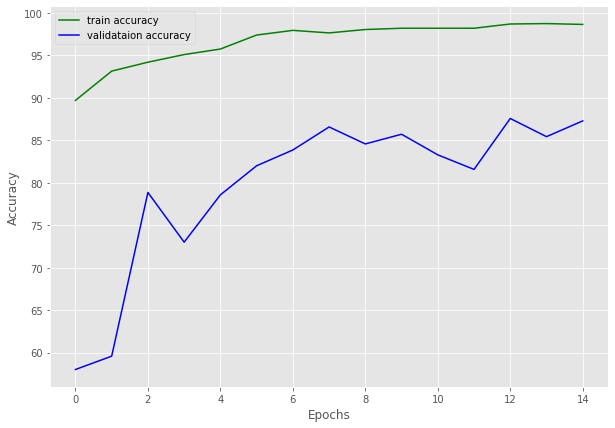

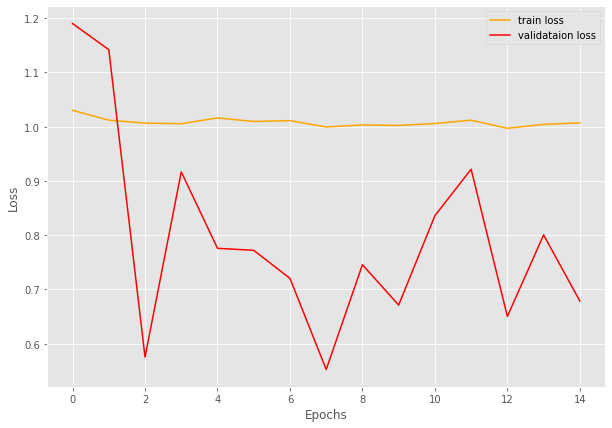

In [ ]:
# Save the trained model weights.
save_model(epochs, model, optimizer, criterion11)
# Save the loss and accuracy plots.
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')